In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
import numpy as np 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/gender project/Gender-prediction(all).csv',error_bad_lines=False)
df


,FullName,Gender
0,শ্বরিয়া ঘোষ,নারী
1,শিকা খায়ের এশা,নারী
2,এশা ধর,নারী
3,শিতা সুর আপন,নারী
4,র্মি সেন,নারী
...,...,...
5743,হোসেন বেপারি,পুরুষ
5744,হ্যান্ডরি জিতু,পুরুষ
5745,হ্যাপি আক্তার,নারী
5746,হ্যাপি রিচিল,নারী


Text(0.5, 1.0, 'Number of Male and Female Name')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2474 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2497 missing from current font.
  font.set_text(s

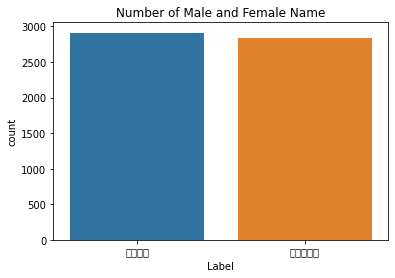

In [ ]:
sns.countplot(df.Gender)
plt.xlabel('Label')
plt.title('Number of Male and Female Name')

In [ ]:
X = df.FullName
Y = df.Gender
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(128)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               91648     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                

In [ ]:
history=model.fit(sequences_matrix,Y_train,batch_size=64
                  ,epochs=30,
          validation_split=0.2)

Epoch 1/30
58/58 [==============================] - 1s 20ms/step - loss: 0.6579 - accuracy: 0.6308 - val_loss: 0.5266 - val_accuracy: 0.7793
Epoch 2/30
58/58 [==============================] - 1s 12ms/step - loss: 0.4404 - accuracy: 0.7904 - val_loss: 2.4027 - val_accuracy: 0.4837
Epoch 3/30
58/58 [==============================] - 1s 12ms/step - loss: 1.0010 - accuracy: 0.6977 - val_loss: 0.3847 - val_accuracy: 0.8130
Epoch 4/30
58/58 [==============================] - 1s 12ms/step - loss: 0.3742 - accuracy: 0.8344 - val_loss: 0.3731 - val_accuracy: 0.7957
Epoch 5/30
58/58 [==============================] - 1s 12ms/step - loss: 0.3048 - accuracy: 0.8461 - val_loss: 0.3774 - val_accuracy: 0.7891
Epoch 6/30
58/58 [==============================] - 1s 12ms/step - loss: 0.3055 - accuracy: 0.8431 - val_loss: 0.3755 - val_accuracy: 0.8033
Epoch 7/30
58/58 [==============================] - 1s 12ms/step - loss: 0.2793 - accuracy: 0.8515 - val_loss: 0.4053 - val_accuracy: 0.8043
Epoch 8/30
58

In [ ]:

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

36/36 [==============================] - 0s 6ms/step - loss: 0.5644 - accuracy: 0.7852


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.4f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.564
  Accuracy: 0.7852


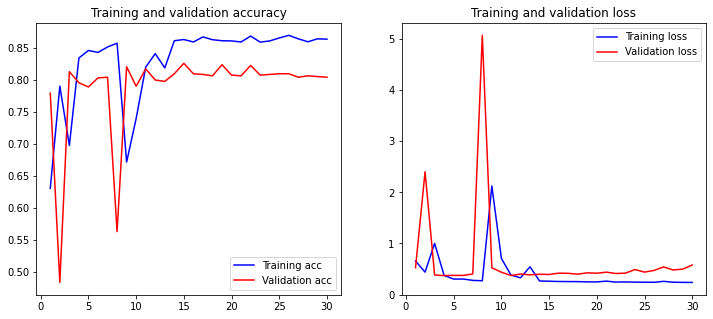

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)